# Predictive Power of LM Surprisal

We fit regression models to determine to what extent accounting for surprisal improves a linear model's predictions of reading time data, relative to a model fit based on control predictors of word length and frequency.

## Dundee Corpus

In [162]:
all_data <- read.csv("data/surprisal_data/combined_surprisal_rts.csv")

Fiting models for eyetracking data (Dundee corpus). To account for spillover effects, we use the previous tokens' features as predictors.

In [163]:
et_control_formula <- 'rt ~ log_freq * word_length + prev_freq_1 * prev_len_1'
et_surprisal_formula <- 'rt ~ surprisal + prev_surprisal_1 + log_freq * word_length + prev_freq_1 * prev_len_1'

In [195]:
predictive_power <- function(data, control_formula, surprisal_formula, tokenization) {
    control_model <- glm(control_formula, data, family = 'gaussian')
    surprisal_model <- glm(surprisal_formula, data, family = 'gaussian')
    print(tokenization)
    print(summary(surprisal_model)$coefficients)
    (logLik(surprisal_model) - logLik(control_model)) / nrow(data)
}

In [196]:
dundee_et <- all_data[all_data$corpus == "dundee",]
dundee_orth <- dundee_et[dundee_et$tokenization == "orthographic", ]
dundee_bpe <- dundee_et[dundee_et$tokenization == "bpe", ]
dundee_morph <- dundee_et[dundee_et$tokenization == "morphological", ]

In [197]:
dundee_predictive_power <- data.frame(
    orthographic=predictive_power(dundee_orth, et_control_formula, et_surprisal_formula, "orthographic"),
    bpe=predictive_power(dundee_bpe, et_control_formula, et_surprisal_formula, "bpe"),
    morphological=predictive_power(dundee_morph, et_control_formula, et_surprisal_formula, "morphological")
)


[1] "orthographic"
                          Estimate Std. Error    t value     Pr(>|t|)
(Intercept)            226.5767602  4.2446484  53.379394 0.000000e+00
surprisal                2.3164958  0.1187946  19.500017 2.968882e-84
prev_surprisal_1         2.1488704  0.1168170  18.395183 3.161045e-75
log_freq                 7.3586537  0.9891392   7.439452 1.033377e-13
word_length             -0.9833156  0.6897894  -1.425530 1.540126e-01
prev_freq_1              7.0203932  0.9852294   7.125643 1.055251e-12
prev_len_1              -8.8801142  0.6977781 -12.726272 5.071518e-37
log_freq:word_length    -2.7185452  0.1667011 -16.307903 1.414002e-59
prev_freq_1:prev_len_1  -0.9597138  0.1690259  -5.677910 1.373903e-08
[1] "bpe"
                          Estimate Std. Error    t value     Pr(>|t|)
(Intercept)            225.9530564  4.2375587  53.321517 0.000000e+00
surprisal                2.4127654  0.1176685  20.504766 6.580384e-93
prev_surprisal_1         2.0754128  0.1152422  18.009141 3.41

## Natural Stories Corpus

The only major difference is that this corpus reports self-paced reading times, where spillover effects occur over the previous three words.

In [198]:
spr_control_formula <- 'rt ~ log_freq * word_length + prev_freq_1 * prev_len_1 + prev_freq_2 * prev_len_2 + prev_freq_3 * prev_len_3'

spr_surprisal_formula <- 'rt ~ surprisal + prev_surprisal_1 + prev_surprisal_2 + prev_surprisal_3 + log_freq * word_length + prev_freq_1 * prev_len_1 + prev_freq_2 * prev_len_2 + prev_freq_3 * prev_len_3'

In [199]:
natural_stories_spr <- all_data[all_data$corpus == "natural_stories", ]
natural_stories_orth <- natural_stories_spr[natural_stories_spr$tokenization == "orthographic", ]
natural_stories_bpe <- natural_stories_spr[natural_stories_spr$tokenization == "bpe", ]
natural_stories_morph <- natural_stories_spr[natural_stories_spr$tokenization == "morphological", ]

In [200]:
natural_stories_predictive_power <- data.frame(
    orthographic=predictive_power(natural_stories_orth, spr_control_formula, spr_surprisal_formula, "orthographic"),
    bpe=predictive_power(natural_stories_bpe, spr_control_formula, spr_surprisal_formula, "bpe"),
    morphological=predictive_power(natural_stories_morph, spr_control_formula, spr_surprisal_formula, "morphological")
)


[1] "orthographic"
                           Estimate Std. Error    t value     Pr(>|t|)
(Intercept)            322.12768610  7.0103438 45.9503405 0.000000e+00
surprisal                0.91267414  0.1199950  7.6059336 3.237776e-14
prev_surprisal_1         0.70237692  0.1211054  5.7997179 6.961480e-09
prev_surprisal_2         0.24169368  0.1160900  2.0819512 3.738678e-02
prev_surprisal_3         0.33941011  0.1135599  2.9888196 2.811271e-03
log_freq                 4.02679300  1.0505539  3.8330190 1.278001e-04
word_length             -4.10153914  0.7849861 -5.2249832 1.797078e-07
prev_freq_1              2.04327381  1.0879863  1.8780327 6.042237e-02
prev_len_1              -2.34998454  0.8089215 -2.9050835 3.684196e-03
prev_freq_2             -0.34790474  1.0462153 -0.3325365 7.394951e-01
prev_len_2               0.26049465  0.7991679  0.3259573 7.444674e-01
prev_freq_3              1.30780073  1.0108546  1.2937575 1.957961e-01
prev_len_3              -0.83237816  0.7886703 -1.0554196 

## Predictive Power (Table 1)

The tables report the per-token $\Delta LogLik$. These show that incorporating surprisal into the control models improved their ability to predict reading times.

In [170]:
dundee_predictive_power

orthographic,bpe,morphological
<dbl>,<dbl>,<dbl>
0.01034982,0.010752,0.01025458


In [171]:
natural_stories_predictive_power

orthographic,bpe,morphological
<dbl>,<dbl>,<dbl>
0.008818827,0.01001237,0.008580439


This is in line with the values for the 5-gram models from Wilcox et al (2020), especially accounting for differences in the training corpora. There does not seem to be a major difference between the models' predictive power. 

## Cross-Validation

These metrics are reported for the entire dataset, so we now evaluate regression models against held-out data. For each model, we now report $\Delta LogLik$ for each run of 10-fold cross-validation.

In [172]:
test_data_loglik <- function(model, test_data) {
    predictions <- predict(model, test_data)
    stdev <- sigma(model)
    dnorm(test_data$rt, predictions, stdev, log = TRUE)
}

In [173]:
cross_validate <- function(data, indices, control_formula, surprisal_formula) {
    data<-data[indices,]
    folds <- cut(seq(1,nrow(data)),breaks=10,labels=FALSE) # this is the same for each model
    predictive_power <- seq(1:10)
    for(i in 1:10){
        test_indices <- which(folds==i)
        test_data <- data[test_indices, ]
        train_data <- data[-test_indices, ]
        fold_control_model <- glm(control_formula, train_data, family = 'gaussian')
        fold_surprisal_model <- glm(surprisal_formula, train_data, family = 'gaussian')
        surprisal_diff <- test_data_loglik(fold_surprisal_model, test_data) - test_data_loglik(fold_control_model, test_data)
        predictive_power[i] <- mean(surprisal_diff) # summed per-token log likelihoods, divided by number of tokens 
        }
    predictive_power
}

In [174]:
corpus_cv <- function(orth_data, bpe_data, morph_data, control_formula, surprisal_formula) {
    shuffled_indices <- sample(nrow(orth_data))
    cv_results <- data.frame(
      orthographic = cross_validate(orth_data, shuffled_indices, control_formula, surprisal_formula),
       bpe = cross_validate(bpe_data, shuffled_indices, control_formula, surprisal_formula),
       morphological = cross_validate(morph_data, shuffled_indices, control_formula, surprisal_formula)
    )
    cv_results
}

In [175]:
dundee_cv_results <- corpus_cv(dundee_orth, dundee_bpe, dundee_morph, et_control_formula, et_surprisal_formula)
natural_stories_cv_results <- corpus_cv(natural_stories_orth, natural_stories_bpe, natural_stories_morph,
                                        spr_control_formula, spr_surprisal_formula)


In [91]:
dundee_cv_results$corpus = 'Dundee'
natural_stories_cv_results$corpus = 'Natural Stories'
combined_cv <- rbind(dundee_cv_results, natural_stories_cv_results)

In [92]:
library(ggplot2)
library(reshape2)
library(dplyr)

In [93]:
combined_cv <- melt(combined_cv) %>% rename(Tokenization = variable)

Using corpus as id variables



In [128]:
options(repr.plot.width=10, repr.plot.height=8)

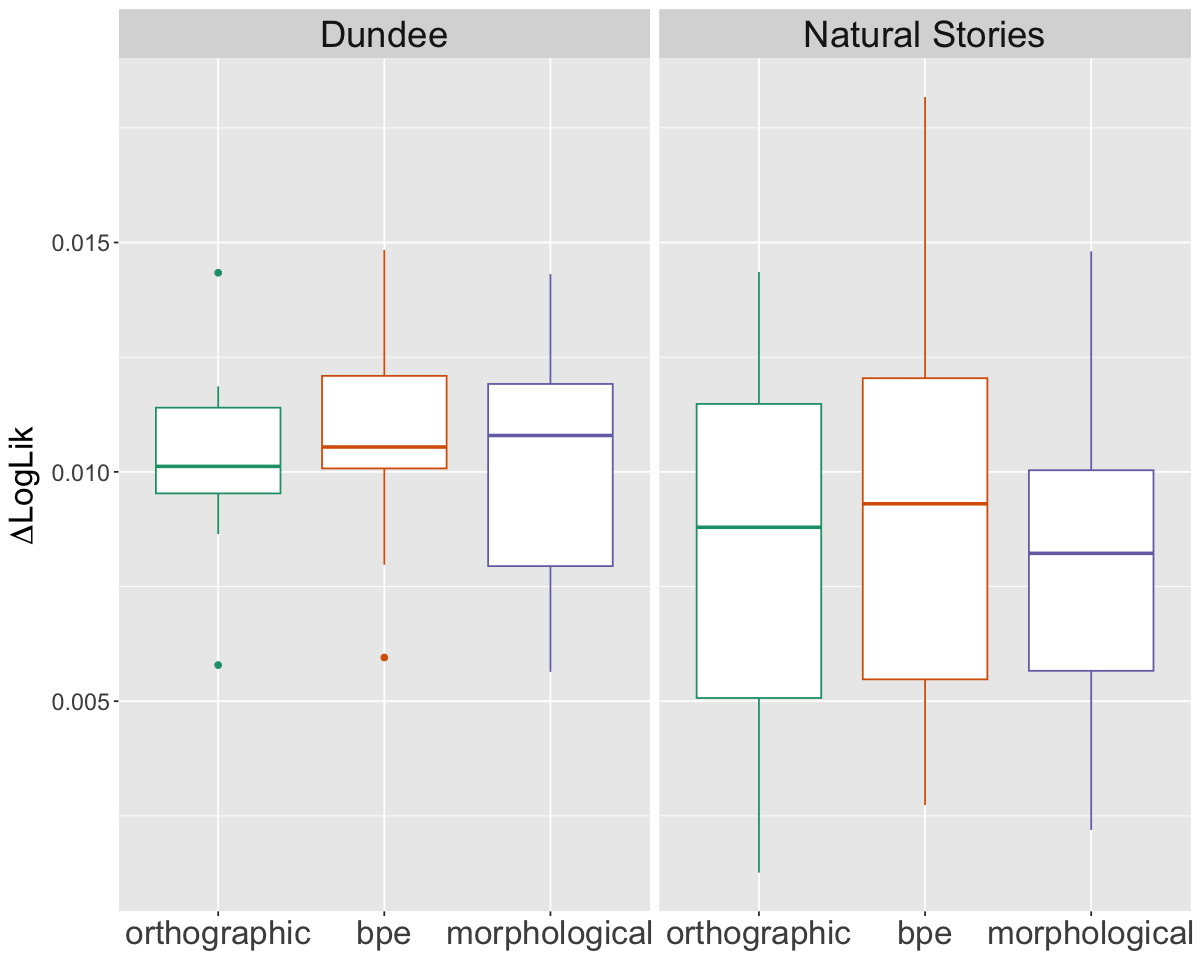

In [181]:
plt <- ggplot(combined_cv, aes(x = Tokenization, y = value, color = Tokenization)) + geom_boxplot()
plt <- plt + ylab(expression(paste(Delta, "LogLik")))
theme <- theme(axis.title = element_text(size = 20), axis.title.x = element_blank(), axis.text.x = element_text(size = 20),
               axis.text.y = element_text(size = 14),
               strip.text.x = element_text(size = 22), legend.position = "none")
plt + facet_grid(. ~corpus) + theme + labs(fill = "Tokenization") + scale_color_brewer(palette = "Dark2")



## Statistical Significance Testing

We use a nonparametric test since we have 10 datapoints and the models were fit independently of one another. A  p-value above the cutoff should show there is no statistically significant difference between the $\Delta LogLik$ estimated for the folds for the two subword tokenization methods relative to predictions over orthographic words.

The models trained on the BPE tokenizer output and the morphological segmenter's output both did not have statistically significant differences in their predictive power compared to just using orthographic words.

### Dundee

In [95]:
wilcox.test(dundee_cv_results$orthographic, dundee_cv_results$bpe)


	Wilcoxon rank sum exact test

data:  dundee_cv_results$orthographic and dundee_cv_results$bpe
W = 39, p-value = 0.4359
alternative hypothesis: true location shift is not equal to 0


In [96]:
wilcox.test(dundee_cv_results$orthographic, dundee_cv_results$morphological)


	Wilcoxon rank sum exact test

data:  dundee_cv_results$orthographic and dundee_cv_results$morphological
W = 49, p-value = 0.9705
alternative hypothesis: true location shift is not equal to 0


### Natural Stories

In [97]:
wilcox.test(natural_stories_cv_results$orthographic, natural_stories_cv_results$bpe)


	Wilcoxon rank sum exact test

data:  natural_stories_cv_results$orthographic and natural_stories_cv_results$bpe
W = 45, p-value = 0.7394
alternative hypothesis: true location shift is not equal to 0


In [98]:
wilcox.test(natural_stories_cv_results$orthographic, natural_stories_cv_results$morphological)


	Wilcoxon rank sum exact test

data:  natural_stories_cv_results$orthographic and natural_stories_cv_results$morphological
W = 53, p-value = 0.8534
alternative hypothesis: true location shift is not equal to 0


### Slowdown in reading time due to surprisal 

Replicating the qualitative results from Wilcox et al (2020) on the relationship between surprisal and reading time. For each LM, we fit a generalized additive model (GAM) and plot the slowdown in a word's reading time due to surprisal. The plotting functionality with the `mgcViz` library was not compatible with other `ggplot`-based tools to make a figure with a grid.

Wilcox et al (2020) plotted the slowdown aggregated over all previous tokens, but there are related plots in Smith and Levy (2013). 

In [124]:
library(mgcViz)

Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Loading required package: qgam

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Registered S3 method overwritten by 'mgcViz':
  method from  
  +.gg   GGally


Attaching package: ‘mgcViz’


The following objects are masked from ‘package:stats’:

    qqline, qqnorm, qqplot




In [142]:
plot_gam <- function(data, color_index, plot_title, corpus) {
    rt_surprisal_gam <- gam(rt ~ s(surprisal, bs = "cr", k = 20) + s(prev_surprisal_1, bs = "cr", k = 20)
                + te(log_freq, word_length, bs = "cr") + te(prev_freq_1, prev_len_1, bs = "cr"), data=data)

    if (corpus == "natural_stories") {
        rt_surprisal_gam <- gam(rt ~ s(surprisal, bs = "cr", k = 20) + s(prev_surprisal_1, bs = "cr", k = 20) 
                + s(prev_surprisal_2, bs = 'cr', k = 20) + s(prev_surprisal_3, bs = 'cr', k = 20)
                + te(log_freq, word_length, bs = "cr") + te(prev_freq_1, prev_len_1, bs = "cr") 
                + te(prev_freq_2, prev_len_2, bs = 'cr') + te(prev_freq_3, prev_len_3, bs = 'cr'), data=data)
    }
    # formula from pg 3 of https://arxiv.org/pdf/2006.01912.pdf (Wilcox et al 2020)
    plot(getViz(rt_surprisal_gam), select = 1, xlab = "surprisal", ylab = "slowdown") + l_fitLine(color = color_index) + l_ciLine(color = color_index) + 
    theme_get() + labs(x = "Surprisal", y = "Slowdown in Reading Time (ms)", title = plot_title)
}



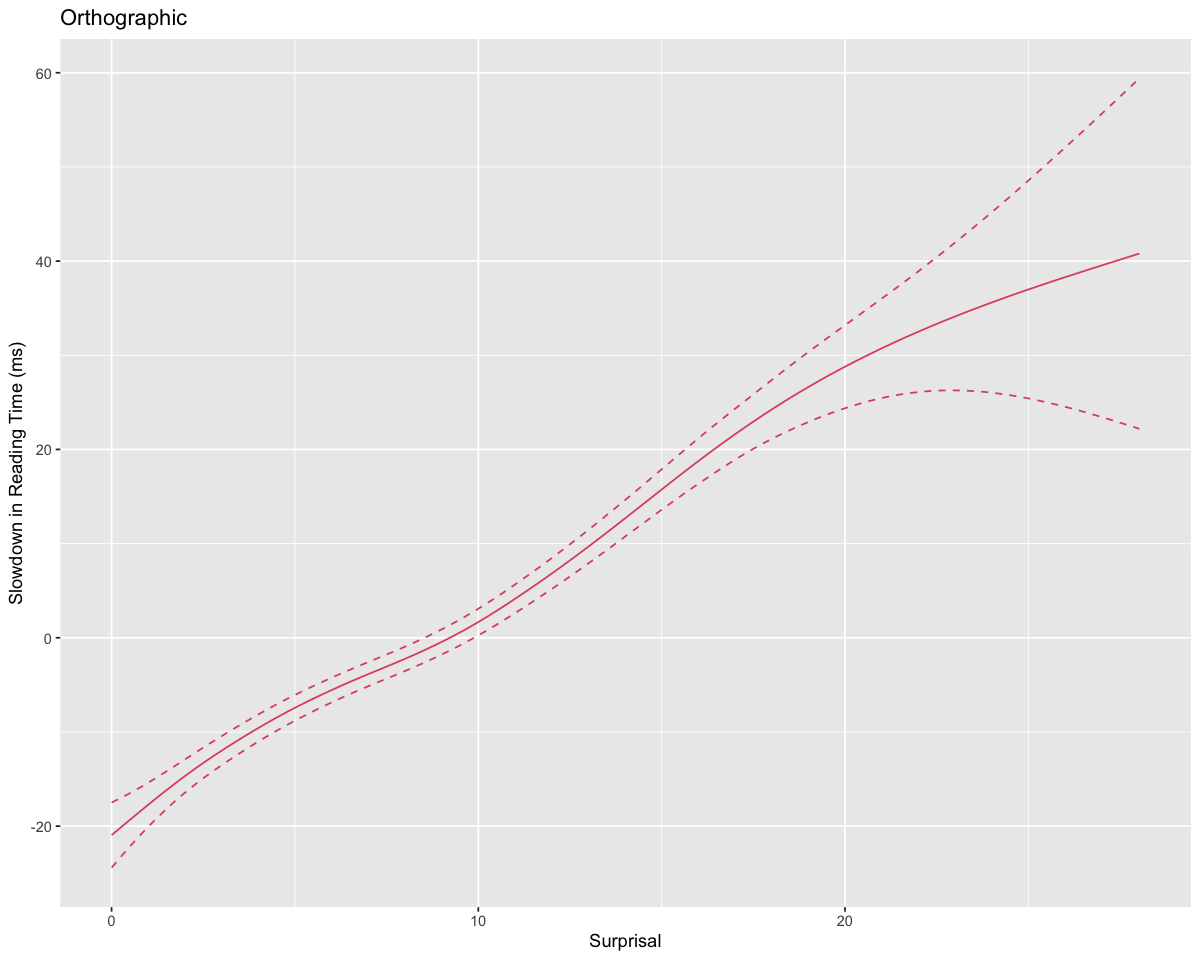

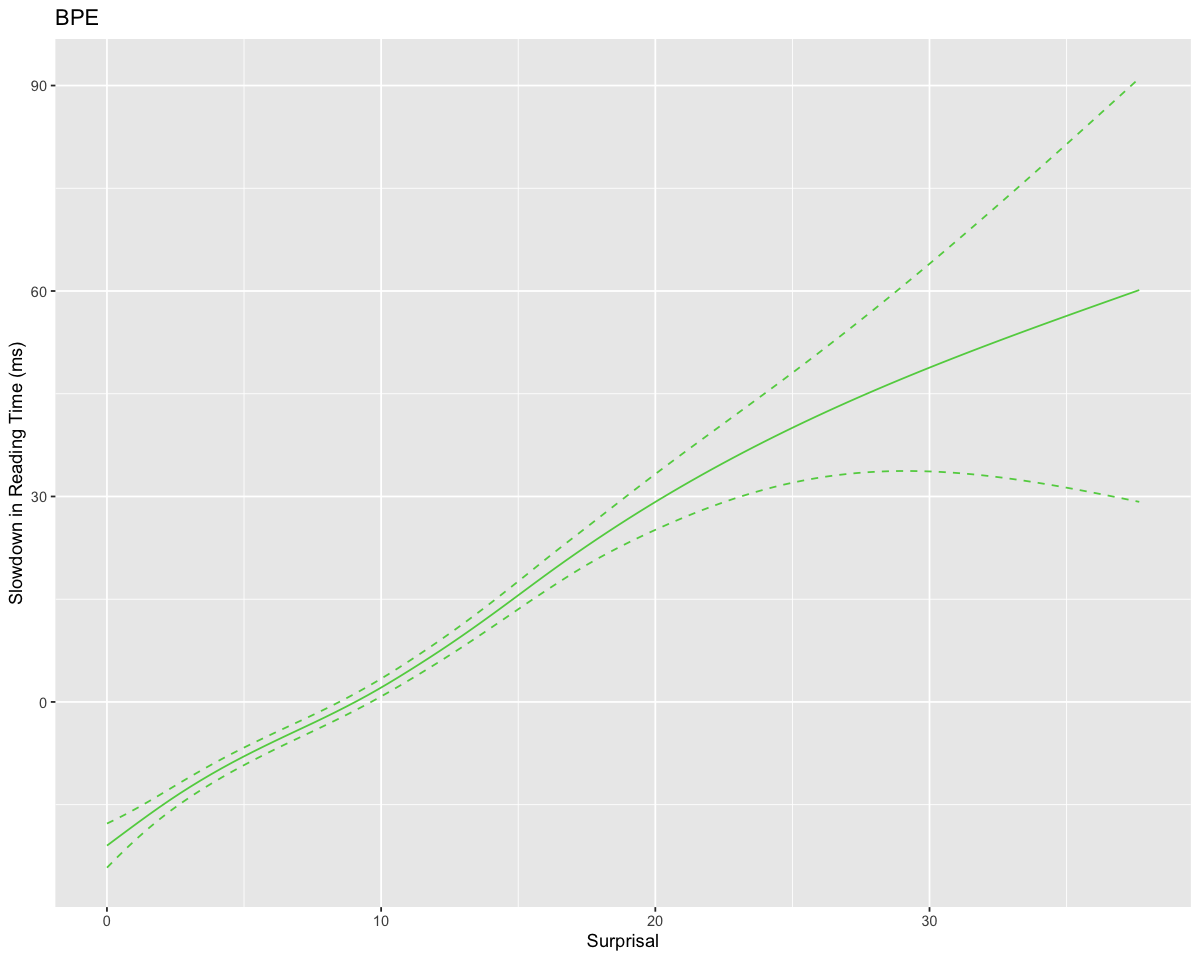

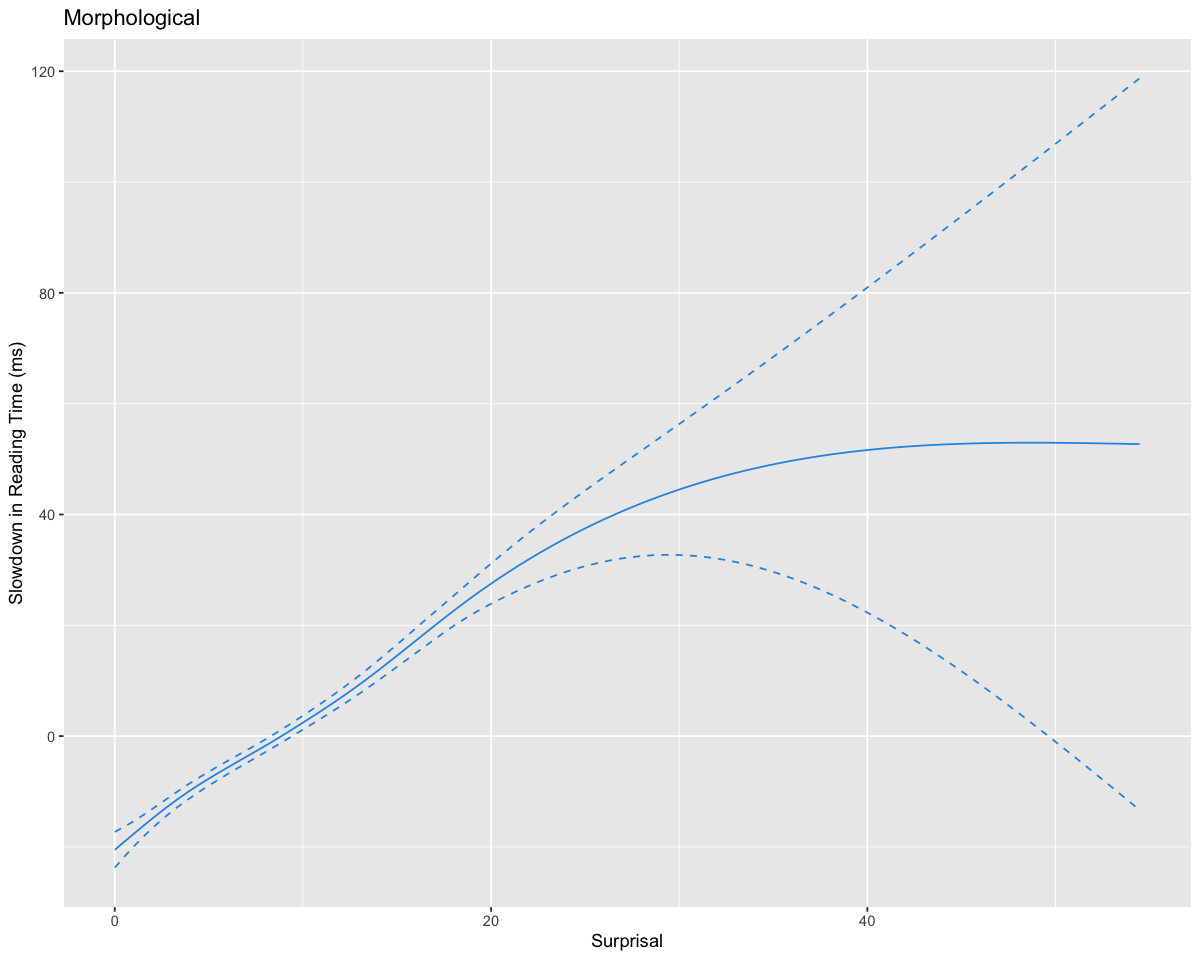

In [143]:
plot_gam(dundee_orth, 2, "Orthographic", "dundee")
plot_gam(dundee_bpe, 3, "BPE", "dundee")
plot_gam(dundee_morph, 4, "Morphological", "dundee")

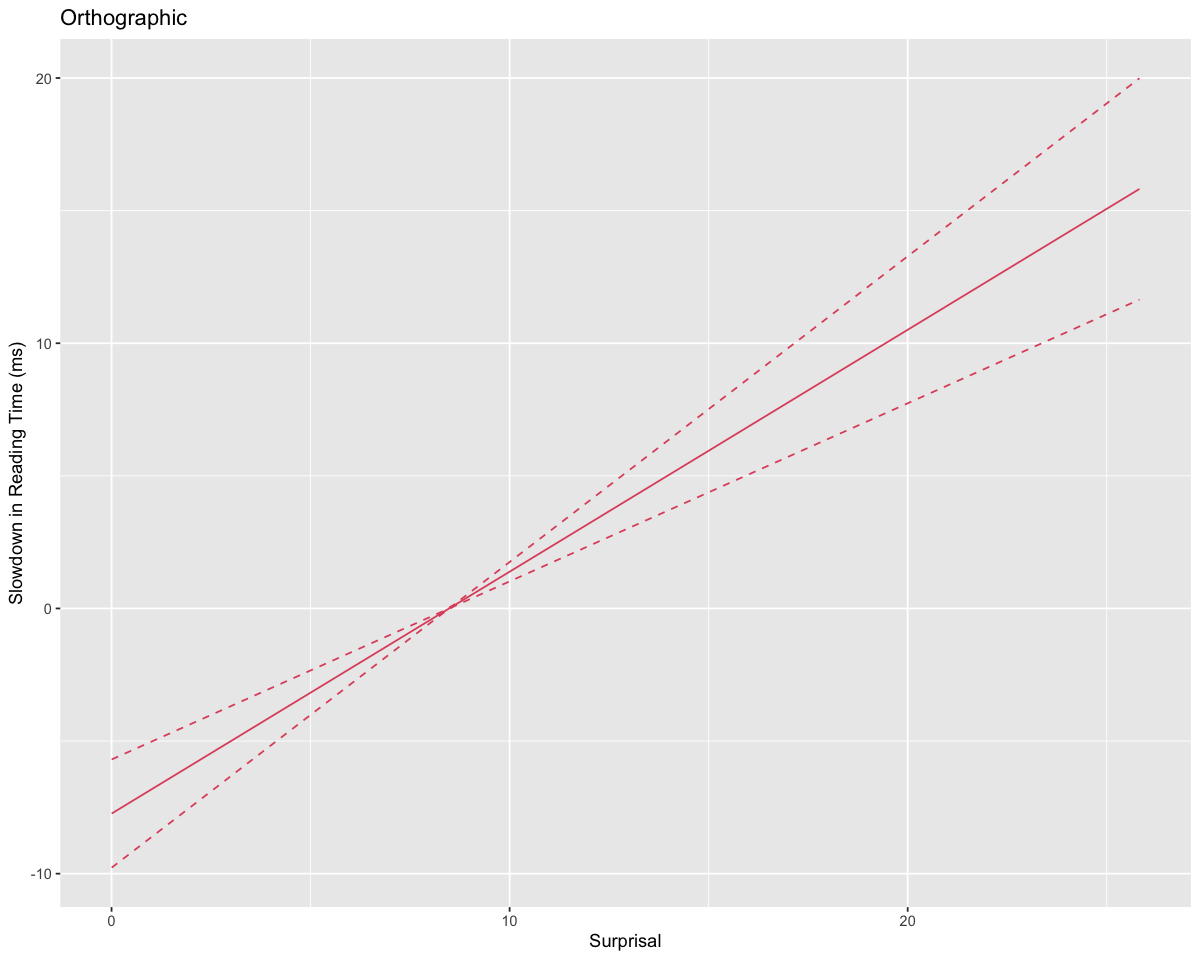

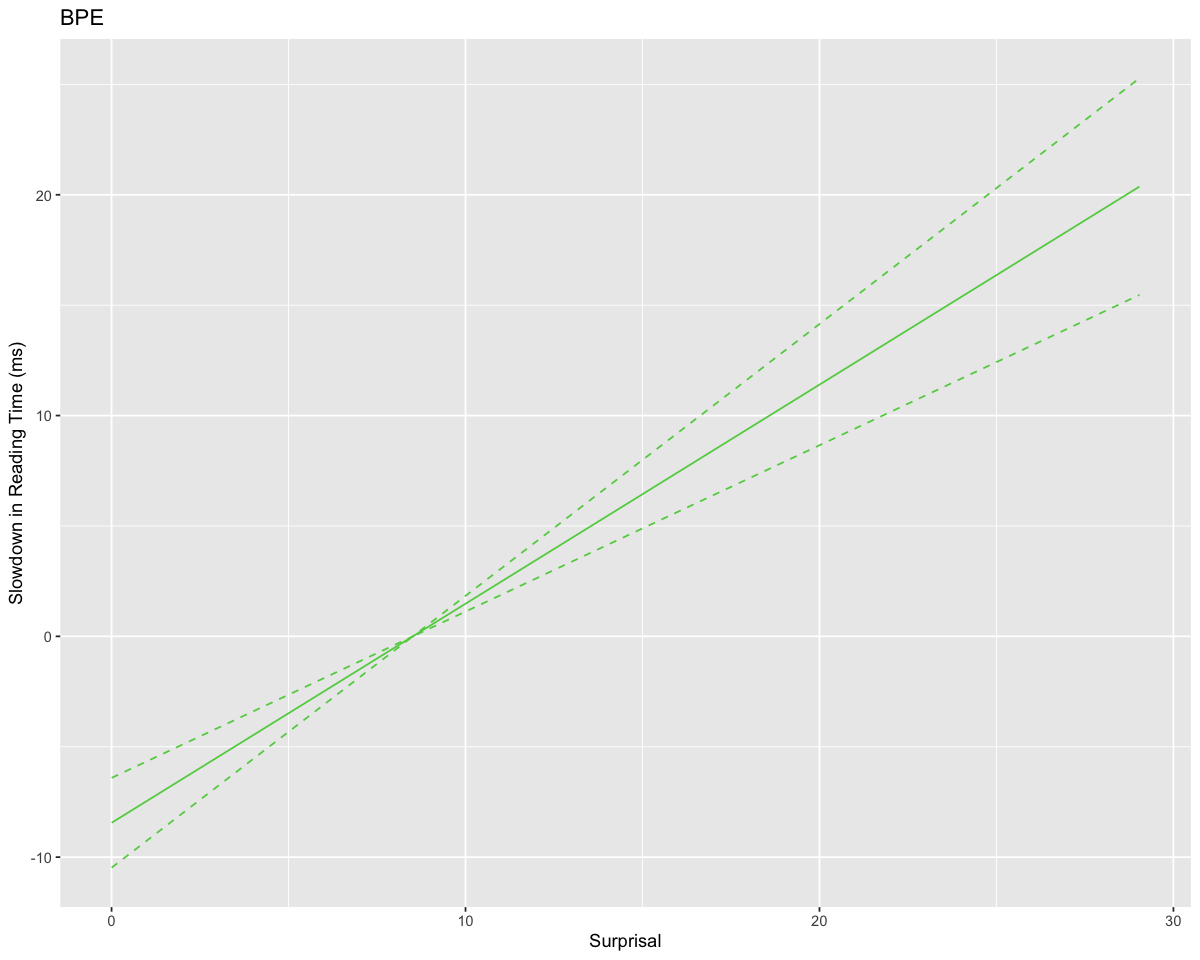

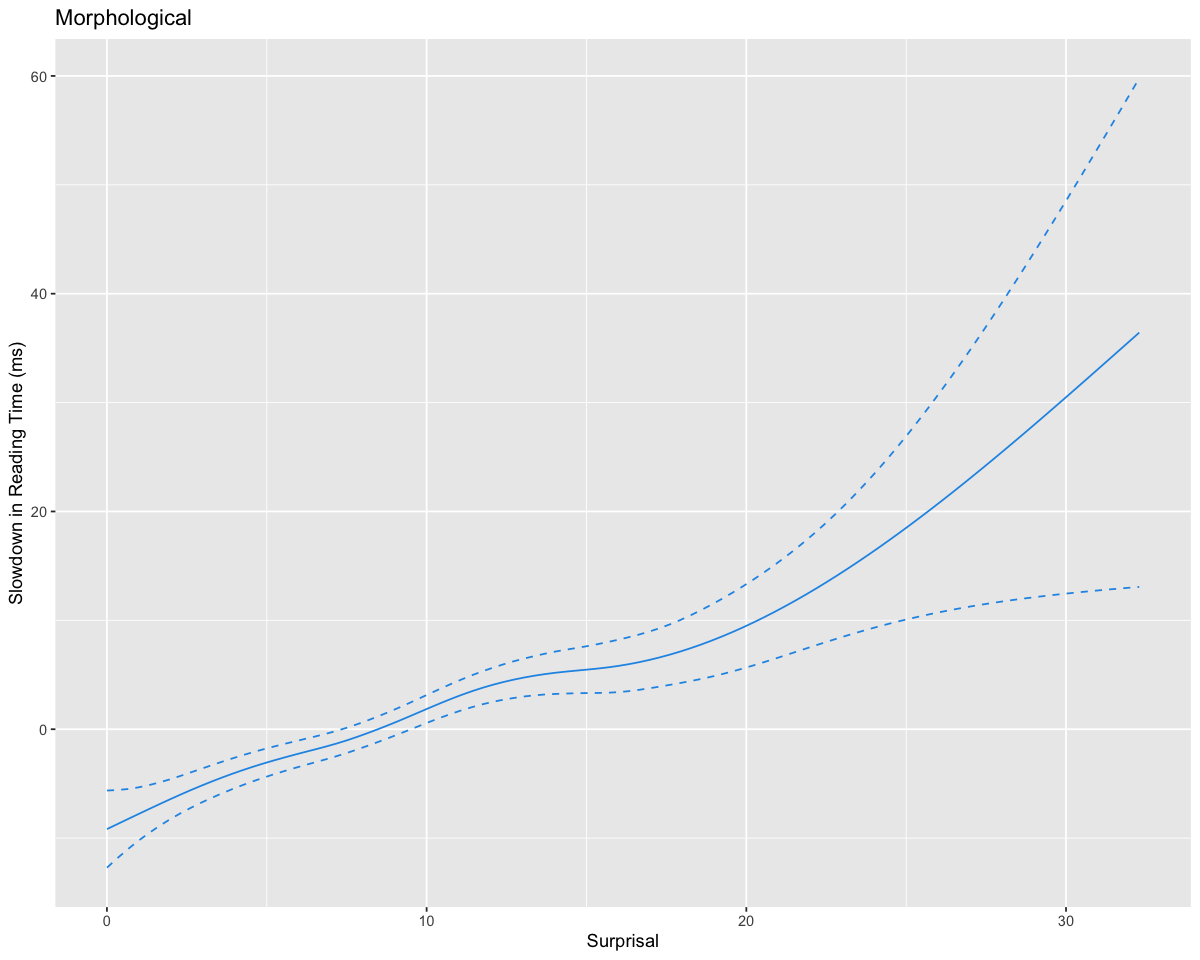

In [144]:
plot_gam(natural_stories_orth, 2, "Orthographic", "dundee")
plot_gam(natural_stories_bpe, 3, "BPE", "dundee")
plot_gam(natural_stories_morph, 4, "Morphological", "dundee")